In [1]:
import kagglehub

path = kagglehub.dataset_download("siddharthkumarsah/plastic-bottles-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/plastic-bottles-image-dataset


In [2]:
!ls /root/.cache/kagglehub/datasets/siddharthkumarsah/plastic-bottles-image-dataset/versions/2/'Plastic Bottle Image Dataset'

ls: cannot access '/root/.cache/kagglehub/datasets/siddharthkumarsah/plastic-bottles-image-dataset/versions/2/Plastic Bottle Image Dataset': No such file or directory


In [3]:
path_bottle = path + '/Plastic Bottle Image Dataset'
print(path_bottle)

/kaggle/input/plastic-bottles-image-dataset/Plastic Bottle Image Dataset


In [4]:
!pip install ultralytics==8.3.40

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [5]:
!pip install pyyaml

In [6]:
import yaml

data = {
    'train': path_bottle + '/train/images',
    'val': path_bottle + '/valid/images',
    'names': {0:'bottle'}
}

with open('data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

results = model.train(
   data='data.yaml',
   imgsz=640,
   epochs=30,
   batch=8,
   name='yolov8n_v8_bottles'
)

KeyboardInterrupt: 

In [7]:
data = {
    'train': path_bottle + '/train/images',
    'val': path_bottle + '/test/images',
    'names': {0:'bottle'}
}

with open('data_test.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

In [27]:
!pip install torch torchvision torchaudio

In [9]:
from ultralytics import YOLO

model = YOLO('best.pt')

results = model.val(data='data_test.yaml', split='val')

print(results)

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 24.6MB/s]
val: Scanning /kaggle/input/plastic-bottles-image-dataset/Plastic Bottle Image Dataset/test/labels... 648 images, 0 backgrounds, 0 corrupt: 100%|██████████| 648/648 [00:10<00:00, 62.87it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/plastic-bottles-image-dataset/Plastic Bottle Image Dataset/test is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 20, len(boxes) = 792. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:41<00:00,  1.01s/it]


                   all        648        792      0.581      0.476      0.447      0.332
Speed: 0.9ms preprocess, 3.9ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f0e1259e750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033


image 1/1 /kaggle/input/plastic-bottles-image-dataset/Plastic Bottle Image Dataset/test/images/-2_jpg.rf.56c6648de860249fe106b20ce690a650.jpg: 640x640 1 bottle, 8.3ms
Speed: 3.7ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


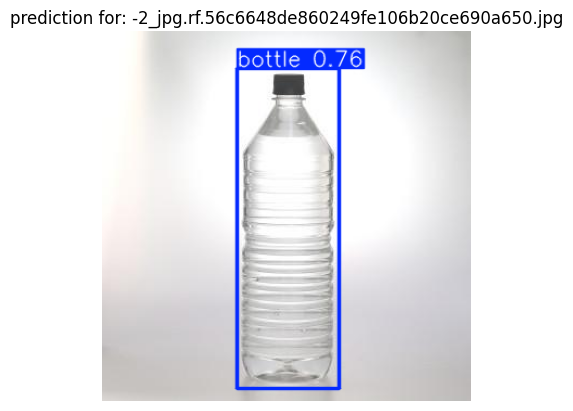

In [16]:
import os
import cv2
import matplotlib.pyplot as plt

image_files = sorted([f for f in os.listdir(f'{path_bottle}/test/images') if f.endswith(('.jpg', '.jpeg', '.png'))])

image_index = 7

if image_index < 0 or image_index >= len(image_files):
    raise IndexError("Index out of bound")

image_file = image_files[image_index]
image_path = os.path.join(f'{path_bottle}/test/images', image_file)

results = model(image_path)

for result in results:
    annotated_frame = result.plot()
    annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

    plt.imshow(annotated_frame)
    plt.axis('off')
    plt.title(f"prediction for: {image_file}")
    plt.show()